In [1]:
from owslib.wcs import WebCoverageService
import rasterio as rs
from rasterio import plot

In [8]:
wcs = WebCoverageService('https://maps.isric.org/mapserv?map=/map/wrb.map')

In [3]:
cov_id = 'MostProbable'
mp = wcs.contents[cov_id]
mp.boundingboxes

[{'nativeSrs': 'http://www.opengis.net/def/crs/EPSG/0/4326',
  'bbox': (-61.0674762500609, -180.0, 83.999167206, 186.933274624154)}]

In [4]:
mp.supportedFormats

['image/tiff',
 'image/png',
 'image/jpeg',
 'image/png; mode=8bit',
 'image/vnd.jpeg-png',
 'image/vnd.jpeg-png8']

In [5]:
subsets = [('X',-105, -90),('Y', 25, 50)]

In [6]:
crs = "http://www.opengis.net/def/crs/EPSG/0/152160"

In [10]:
response = wcs.getCoverage(
    identifier = [cov_id],
    crs = crs,
    subsets = subsets,
    resx = 250,
    resy = 250,
    format = mp.supportedFormats[2]
)

HTTPError: 500 Server Error: Internal Server Error for url: https://maps.isric.org/mapserv?map=/map/wrb.map&amp;&version=2.0.1&request=GetCoverage&service=WCS&CoverageID=MostProbable&crs=http://www.opengis.net/def/crs/EPSG/0/152160&format=image/jpeg&subset=X(-105,-90)&subset=Y(25,50)

In [70]:
with open ('./MostProbableCentral.jpg','wb') as file:
    file.write(response.read())

In [71]:
response = wcs.getCoverage(
    identifier = [cov_id],
    crs = crs,
    subsets = subsets,
    resx = 250,
    resy = 250,
    format = mp.supportedFormats[0]
)

In [72]:
with open ('./MostProbableCentral.tif','wb') as file:
    file.write(response.read())

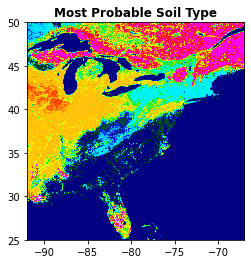

<AxesSubplot:title={'center':'Most Probable Soil Type'}>

In [73]:
MostProb = rs.open('./MostProbableCe.tif',driver = "GTiff")
%matplotlib inline
rs.plot.show(MostProb, title = "Most Probable Soil Type", cmap= "gist_ncar")